In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv("911.csv")

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [49]:
df.drop('e', axis=1, inplace=True)

In [51]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr',
       'Reason', 'Hour', 'Month', 'Day of Week', 'Date'],
      dtype='object')

In [53]:
df.describe()

,lat,lng,zip,Hour,Month
count,663522.000000,663522.000000,583323.000000,663522.000000,663522.000000
mean,40.158162,-75.300105,19236.055791,13.044202,6.334414
std,0.220641,1.672884,298.222637,5.652192,3.475113
min,0.000000,-119.698206,1104.000000,0.000000,1.000000
25%,40.100344,-75.392735,19038.000000,9.000000,3.000000
50%,40.143927,-75.305143,19401.000000,13.000000,6.000000
75%,40.229008,-75.211865,19446.000000,17.000000,9.000000
max,51.335390,87.854975,77316.000000,23.000000,12.000000


In [56]:
df['zip'].value_counts().head(10)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(10) 

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

In [61]:
print("Top 5 zipcodes for 911 calls:\n", df['zip'].value_counts().head())


Top 5 zipcodes for 911 calls:
 19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64


In [62]:
print("Top 5 townships for 911 calls:\n", df['twp'].value_counts().head())

Top 5 townships for 911 calls:
 LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64


In [63]:
print(df.title.head())
print(df.title.nunique())

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object
148


In [9]:
df['title'].nunique()

148

In [11]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [12]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

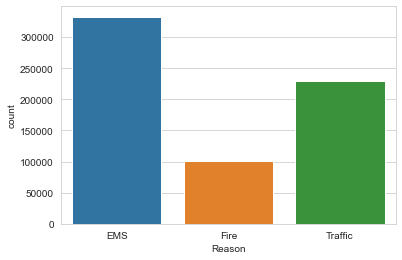

In [14]:
sns.countplot(x='Reason', data =df)

<BarContainer object of 3 artists>

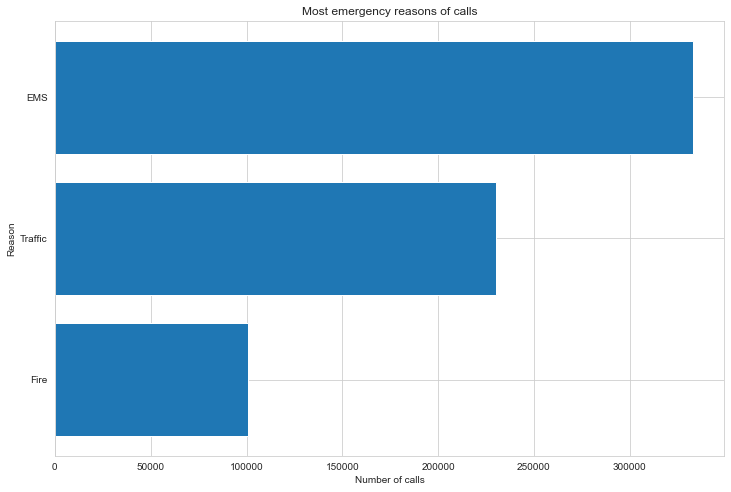

In [64]:
dp = df.Reason.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(dp.index)
y = list(dp.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

In [15]:
type(df['timeStamp'].iloc[0])

str

In [27]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [28]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [29]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [30]:

df['Day of Week'] = df['Day of Week'].map(dmap)


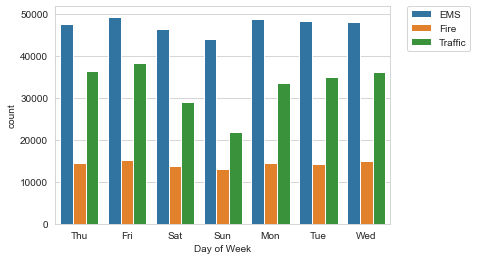

In [31]:

sns.countplot(x='Day of Week',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

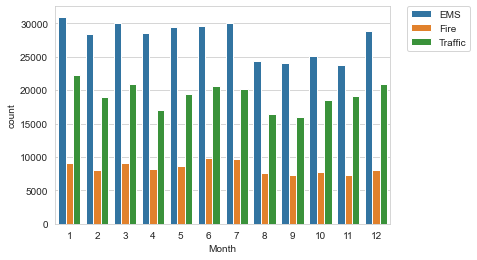

In [32]:
sns.countplot(x='Month',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

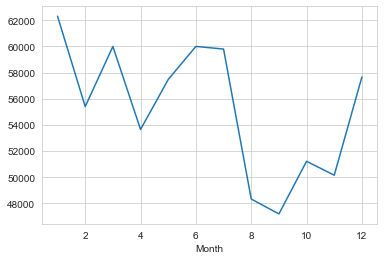

In [34]:
byMonth['twp'].plot()

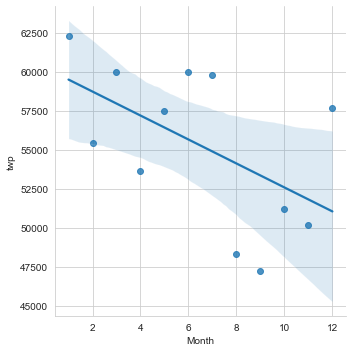

In [35]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [36]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())


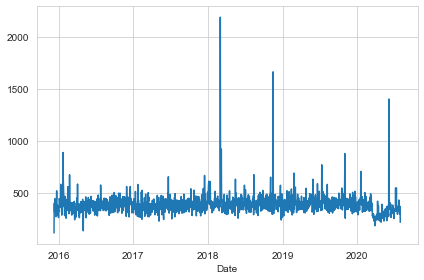

In [37]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()


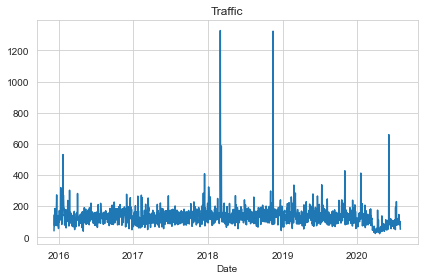

In [38]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

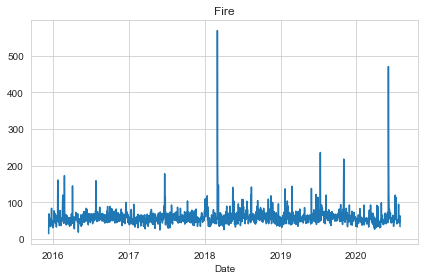

In [39]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

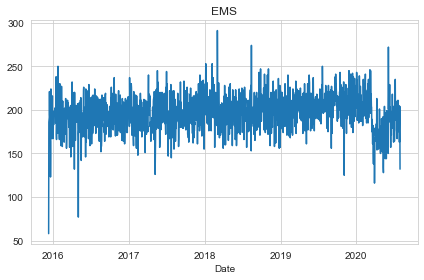

In [40]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()


creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [41]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

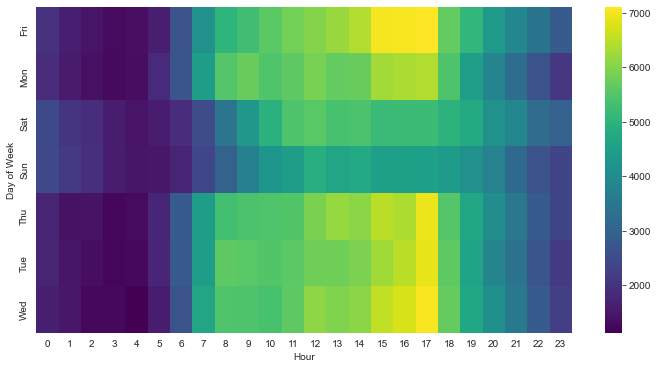

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
 

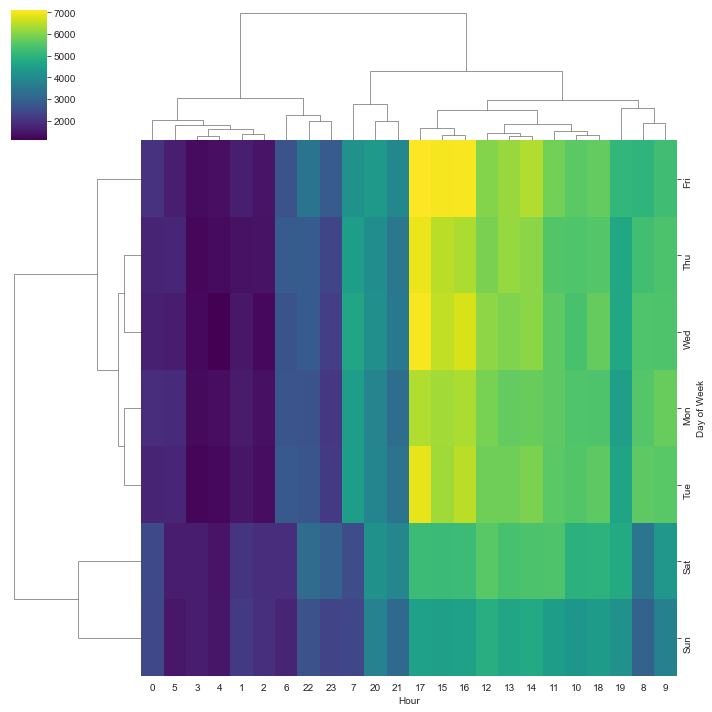

In [44]:
sns.clustermap(dayHour,cmap='viridis')

In [67]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr',
       'Reason', 'Hour', 'Month', 'Day of Week', 'Date'],
      dtype='object')

C:\Users\UMMER\AppData\Local\Temp\ipykernel_24384\194985439.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


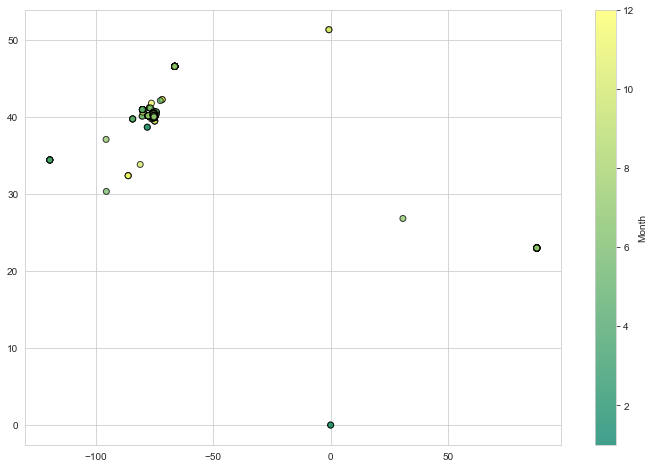

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(df['lng'], df['lat'], c=df['Month'], cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')